# 最长回文子串问题

- 回文
- 子串 => 连续的

用 dp[i] 来表示以 i为中心能扩展的长度

把字符串穿插#

aba => #a#b#a#

abba => #a#b#b#a

- 维护一个最后回文子串 [left, center, right]
  - 最右回文子串，就是所有回文子串最靠右边的那个

有三种情形=>
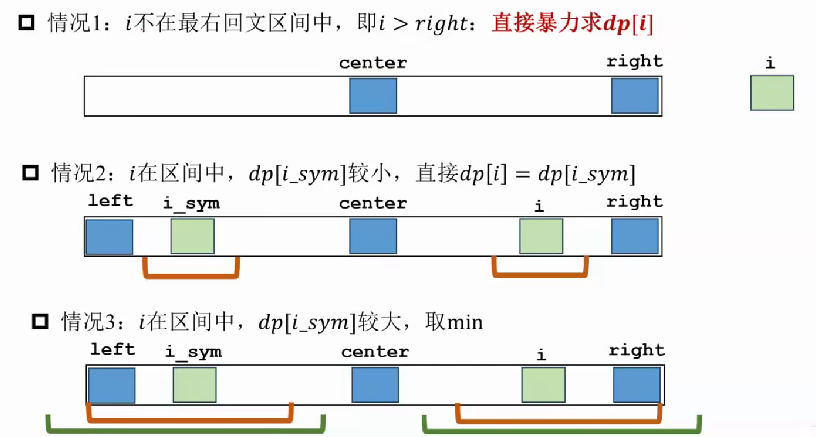


In [4]:
def expend(s, l, r):
    #? 从l， r 向两端扩展
    # 返回可扩展的长度
    #! 保证 s[l] == s[r]
    while l >= 0 and r < len(s) and s[l] == s[r]:
        l -= 1
        r += 1
    # 最后不满足的时候多运算了一次
    return ((r - 1) - (l + 1)) >> 1



def longestPalindrome(s):
    s = '#' + '#'.join(list(s)) + '#'
    # 构建dp数组
    dp = [0] * len(s)
    # 维护最右端的回文子串， center & right
    center, right = 0, 0
    
    # 求dp[i]
    for i in range(1, len(s)):
        # 情况1
        if i > right:
            # 暴力求解
            dp[i] = expend(s, i, i)
        else:
            i_sym = 2 * center - i # 计算对称点
            # 情况2 & 情况3
            min_len = min(dp[i], right - i)  # 当前能利用的最长回文区间
            dp[i] = expend(s, i - min_len, i + min_len) # 暴力求解
        if i + dp[i] > right:
            # 以i为中心的可扩展长度长出了right, 那i就是最右边的
            center = i
            right = i + dp[i]
    print(s)
    print(dp)        
    return max(dp)
            
s = 'abddbaasdvifaasdsf'
print(longestPalindrome(s))



#a#b#d#d#b#a#a#s#d#v#i#f#a#a#s#d#s#f#
[0, 1, 0, 1, 0, 1, 6, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0]
6
